<a href="https://colab.research.google.com/github/phibrainDK/tesis/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib


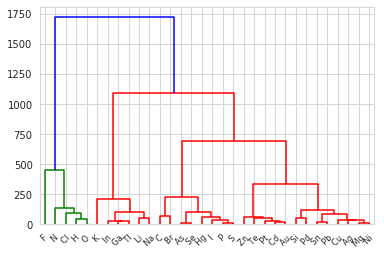

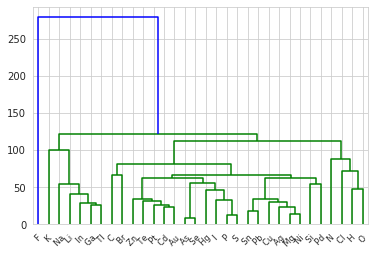

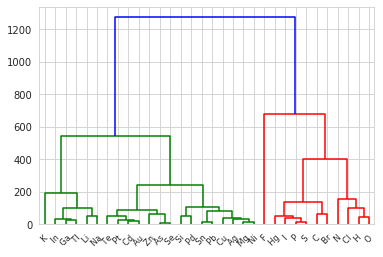

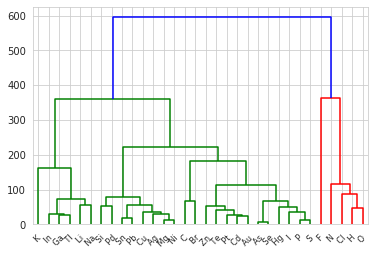

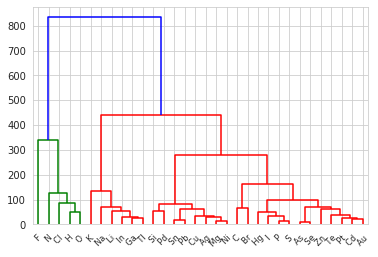

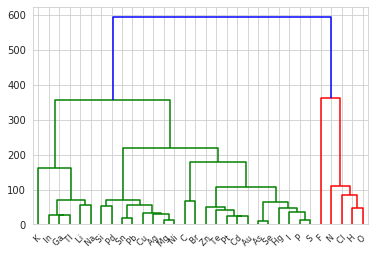

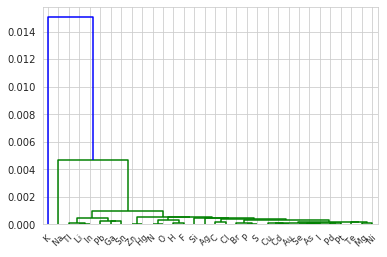

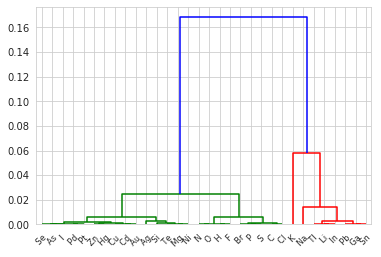

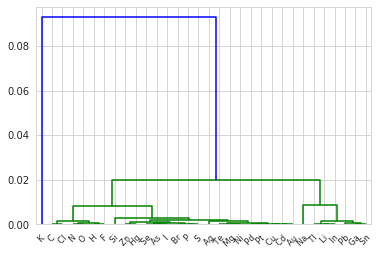

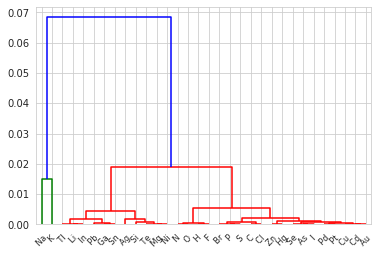

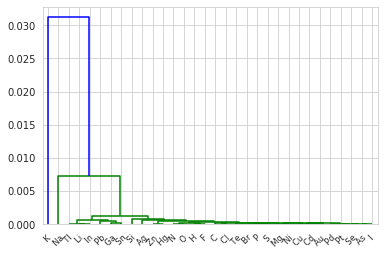

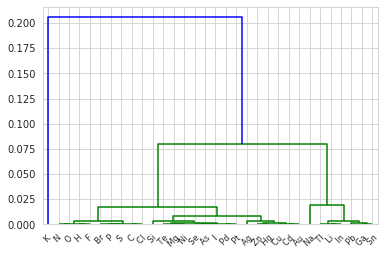

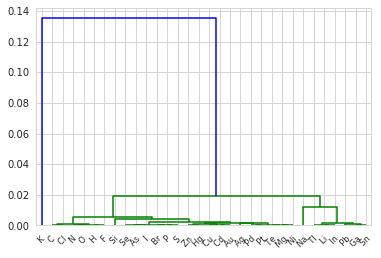

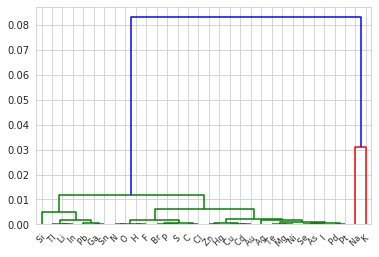

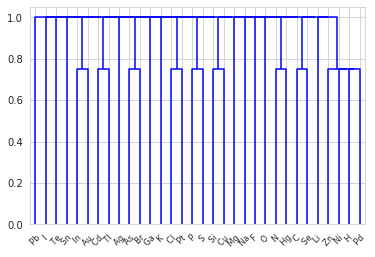

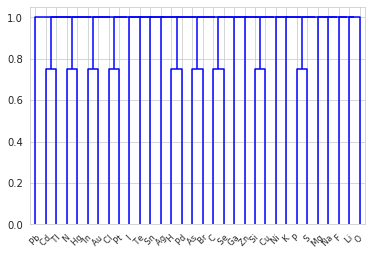

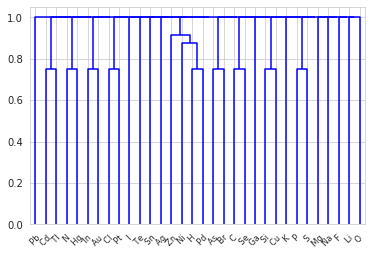

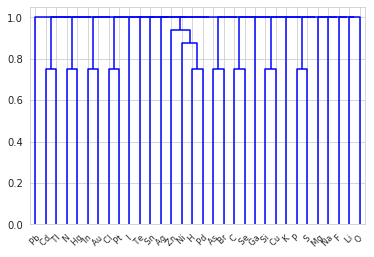

{'icoord': [[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [15.0, 15.0, 32.5, 32.5], [5.0, 5.0, 23.75, 23.75], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [95.0, 95.0, 105.0, 105.0], [72.5, 72.5, 100.0, 100.0], [55.0, 55.0, 86.25, 86.25], [115.0, 115.0, 125.0, 125.0], [135.0, 135.0, 145.0, 145.0], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [155.0, 155.0, 172.5, 172.5], [140.0, 140.0, 163.75, 163.75], [120.0, 120.0, 151.875, 151.875], [225.0, 225.0, 235.0, 235.0], [215.0, 215.0, 230.0, 230.0], [205.0, 205.0, 222.5, 222.5], [195.0, 195.0, 213.75, 213.75], [245.0, 245.0, 255.0, 255.0], [265.0, 265.0, 275.0, 275.0], [305.0, 305.0, 315.0, 315.0], [295.0, 295.0, 310.0, 310.0], [285.0, 285.0, 302.5, 302.5], [270.0, 270.0, 293.75, 293.75], [250.0, 250.0, 281.875, 281.875], [204.375, 204.375, 265.9375, 265.9375], [135.9375, 135.9375, 235.15625, 235.15625], [70.625, 70.625, 185.546875, 185.546875], [14.375, 14.375, 128.0859375, 128.0859375]], 'dcoord': [[0.0, 48.223

In [92]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
%pylab inline
from pylab import rcParams
# rcParams['figure.figsize'] = 20, 12
# rcParams['axes.labelsize']='large'
# rcParams['font.size']=15
import seaborn as sns
# sns.set_style("whitegrid")
from scipy.cluster import hierarchy
from skbio import TreeNode
from google.colab import files

#-------------------------------------------------------
# Consensus Tree 

from io import StringIO
from Bio import Phylo
from Bio.Phylo.Consensus import majority_consensus
from itertools import permutations

url='https://raw.githubusercontent.com/phibrainDK/tesis/master/Periodic%20Table'
dataset=pd.read_csv(url)
dataset_t=dataset.iloc[:, [1, 6, 7, 9, 10, 11]]

#the best comand for now, then i have to clean all the fucking data , omg, this is to much

dataset_t=dataset_t.dropna()
data_labels=dataset_t.iloc[:, 0]
# print(data_labels)
# data_values=dataset_t.iloc[:, [1, 2, 3, 4]]
# print(data_values, "aca")
data_labels=data_labels.transpose()

list_metricas=['euclidean', 'cosine', 'correlation', 'hamming']
list_metodos=['ward', 'single', 'complete', 'average', 'weighted', 'centroid']
# ind=[1, 2, 3, 4]

#testear la cantidad de null types
# print(dataset_t.isnull().sum().sum())

trees=[]

def Find_all_dendrograms(idx, metrica, metodo):
    cur=dataset_t.iloc[:, idx]
    current_data_values=pdist(cur)
    if((metodo=='ward' or metodo == 'centroid') and metrica != 'euclidean'):
        return
    den_cur=linkage(cur, metric=metrica, method=metodo)
    cur_tree=dendrogram(den_cur, labels=list(data_labels))
    matplotlib.pyplot.gcf()
    name=""
    name+=metrica+"_"+metodo+".png"
    plt.savefig(name)
    plt.show()
    files.download(name)
    trees.append(cur_tree)


prueba_indices=[1, 2, 3, 4]

for i in range(len(list_metricas)):
    for j in range(len(list_metodos)):
        Find_all_dendrograms(prueba_indices, list_metricas[i], list_metodos[j])

for tree in trees:
    print(tree)











def random_hclust(m=10, n=10):
    X = np.zeros((m, n))
    for i in range(n):
        X[:, i] = np.random.normal(0, 1, m)
    return linkage(X)

def cut_tree(hclust, id_list, level, upper=True):
    t = TreeNode.from_linkage_matrix(hclust, id_list)
    to_delete = set()
    for tip in t.tips():
        distance = tip.length

        ancestors = tip.ancestors()[::-1]
        current = ancestors.pop()
        while ancestors and distance <= level and not current.is_root():
            distance += current.length
            current = ancestors.pop()

        if distance > level:
            to_delete.update({c for c in current.children})

    t.remove_deleted(lambda n: n in to_delete)
    return t

def main():
    m = 10
    n = 10
    id_list = [str(i) for i in range(m)]
    # hclust = X=dendrogram(a, labels=list(data_labels))
    #files.download('hclust.tree')

if __name__ == "__main__":
    main()













# Tuning 
#-------------------------------------------------------------------------------------------------------

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    return get_cluster_classes(B)

# get_clust_graph(data_values, 32, transpose=True, dataname='Dendrograma para la base de datos X', save="ww2", xticksize=9)
#------------------------------------------------------------------------------------------------------------------------------

#here code for consensus tree
















In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))